In [1]:
import torch
import os

In [2]:
import numpy as np
import torchvision.transforms as T

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
sorted(os.listdir('/Users/yashsurange/Documents/GitHub/FER-from-static-images/CK+_Complete'))

['anger', 'contempt', 'disgust', 'fear', 'happy', 'sadness', 'surprise']

***
## dataset.py check

In [5]:
from dataset import ckplus
test_data=ckplus('./CK+_Complete/')

In [22]:
test_data.__getitem__(0)[0].shape

(300, 300, 3)

In [23]:
image =test_data.__getitem__(0)[0]

In [24]:
type(image)

numpy.ndarray

In [25]:
image=torch.tensor(image)

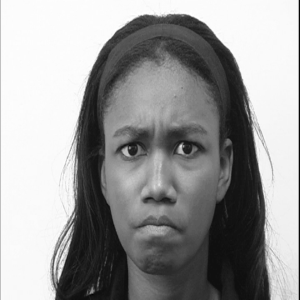

In [26]:
T.ToPILImage()(image.permute(2,0,1))

****

## preprocessing.py check

In [27]:
image.shape

torch.Size([300, 300, 3])

In [28]:
from preprocessing import preprocessing_image

In [29]:
preprocessing_object=preprocessing_image()
image_after_clahe=preprocessing_object.clahe(image)

In [30]:
image_after_clahe.shape

(300, 300, 3)

***
## Clahe check

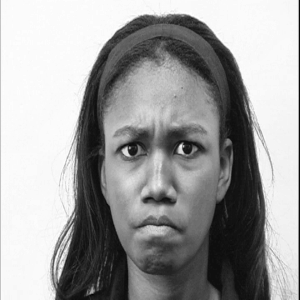

In [31]:
T.ToPILImage()(torch.tensor(image_after_clahe).permute(2,0,1))

****
## Face detection check

In [32]:
face=preprocessing_object.face_detection(image_after_clahe)

In [33]:
type(face)

numpy.ndarray

In [34]:
face.shape

(160, 160, 3)

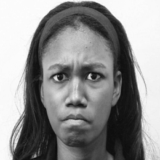

In [35]:
T.ToPILImage()(face)

***
## landmark anotation check

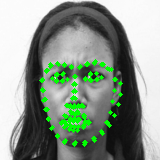

In [177]:
# actual landmark
Image.fromarray(preprocessing_object.landmark_annotation(face))

*****
## Testing everything from start


In [10]:
final_test=test_data.__getitem__(1)[0]

In [13]:
final_test=torch.tensor(final_test)

In [14]:
type(final_test)

torch.Tensor

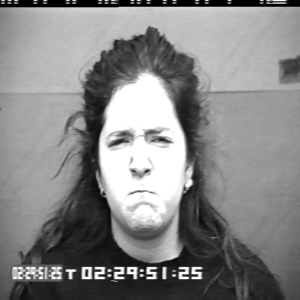

In [15]:
T.ToPILImage()(final_test.permute(2,0,1))

In [16]:
from preprocessing import preprocessing_image
preprocessing_ob=preprocessing_image()
after_clahe=preprocessing_ob.clahe(final_test)


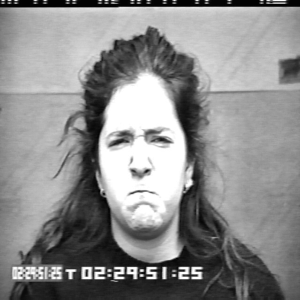

In [17]:
T.ToPILImage()(torch.tensor(after_clahe).permute(2,0,1))

In [18]:
face_detection=preprocessing_ob.face_detection(after_clahe)

In [19]:
annotated_image=preprocessing_ob.landmark_annotation(face_detection)

In [20]:
type(annotated_image)

numpy.ndarray

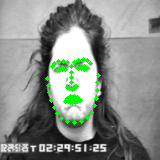

In [21]:
from PIL import Image
Image.fromarray(annotated_image)

## Preprocessing all available images beforehand

In [163]:
## Creating custom dataset

from dataset import ckplus
customdataset=ckplus('./CK+_Complete/')

In [164]:
customdataset.__len__()

1635

In [165]:
total_images=[]

for i in range(customdataset.__len__()):
    total_images.append(customdataset.__getitem__(i)[0])
    

In [166]:
total_images=np.array(total_images)

In [167]:
total_images.shape

(1635, 300, 300, 3)

In [148]:
checking_preprocessing=preprocessing_image()
my_clahe=checking_preprocessing.clahe(total_images[0])

In [169]:
total_images[i].shape

(300, 300, 3)

In [170]:
my_normalised_image=[]

for i in range(total_images.shape[0]):
    my_normalised_image.append(checking_preprocessing.clahe(total_images[i]))

In [172]:
my_normalised_image=np.array(my_normalised_image)

In [173]:
my_normalised_image.shape

(1635, 300, 300, 3)

## Understanding code snippets from : https://github.com/rohan598/Landmark-Aware-Part-based-Ensemble-Transfer-Learning-Network-for-Facial-Expression-Recognition/blob/main/notebooks/summary_notebook.ipynb

******

In [122]:
def load_images(filename_list, width =160, height =160, org_dim = False):
    img_array = []
    
    for i in range(filename_list.shape[0]):
        if org_dim == True:
            im = load_img(path=filename_list[i], color_mode="grayscale")
            im = np.array(im)
            im = np.repeat(im[...,np.newaxis],3,-1).reshape((im.shape[0],im.shape[1],3))
        
        else:  
            im = load_img(path=filename_list[i], target_size=(width,height),interpolation="bilinear", color_mode="grayscale")
            im = np.repeat(np.array(im)[...,np.newaxis],3,-1).reshape((width,height,3))
        
        img_array.append(im)
        
    return np.array(img_array)

In [143]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
import matplotlib.pyplot as plt
import cv2

In [126]:
filenames=(np.array(customdataset.data)[:,0])

In [127]:
total_images_reference=load_images(filenames,300,300)

In [128]:
total_images_reference.shape

(1635, 300, 300, 3)

****
## CLAHE check

In [157]:
def CLAHE(img,clahe, verbose=False):
    
    equr = clahe.apply(img[:,:,0])
    equg = clahe.apply(img[:,:,1])
    equb = clahe.apply(img[:,:,2])
    # print(np.all(equr == equb))
    # print(np.all(equg == equb))
    equ = np.dstack((equr,equg,equb))
    # print(equ.shape)
    
    if verbose==True:
        equ_minmax = cv2.normalize(equ, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        plt.imshow(np.hstack((img/255.0,equ/255.0,equ_minmax)))
        plt.show()
        
    return equ

In [158]:
testing_clahe=cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [159]:
def normalize_data(img_data,params={},verbose=False):
    
    normalized_img_data = []
    # contrast limited adaptive histogram equalization
    clahe_transform = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for i in range(img_data.shape[0]):
        normalized_img_data.append(CLAHE(np.array(img_data[i]),clahe_transform,verbose))
        
    normalized_img_data = np.array(normalized_img_data,dtype=np.uint8)
    
    return normalized_img_data

In [160]:
normalized_img_array_300 = normalize_data(total_images_reference)

In [174]:
total_images_reference.shape

(1635, 300, 300, 3)

In [175]:
np.all(normalized_img_array_300==my_normalised_image)

True

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

*****